### *BTG Pactual Stock Analysis*

This is an analysis of BTG Pactual's stock analysis from 2015 onward. 

BTG Pactual is a leading financial institution in Brazil, operating as an Investment Bank and Asset Management firm. The bank offers a range of financial services, including investment banking, wealth management, asset management, and global markets. It is known for its focus on emerging markets and has a significant presence in Brazil and other Latin American countries.

* _Prospectives_:

{write here BTG's recent efforts, strategy and results}

In [387]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

#Data Retrieving
import yfinance as yf
from bcb import sgs 

In [388]:
# Params

stock_ticker = "BPAC11.SA"

### A grasp of BTG...

In [389]:
btg = yf.Ticker(stock_ticker)

btg_df = pd.DataFrame.from_dict(data=btg.info)
btg_df.head(1)

,address1,address2,city,state,zip,country,phone,website,industry,industryKey,...,returnOnEquity,grossProfits,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
0,"Av. Brigadeiro Faria Lima, 3.477",14th Floor PAtio Victor Malzoni - Itaim Bibi,São Paulo,SP,04538-133,Brazil,55 11 3383 2000,https://www.btgpactual.com.br,Capital Markets,capital-markets,...,0.18539,5487472000,-3041867008,0.189,0.053,0.0,0.0,0.40709,BRL,None


In [390]:
btg_new = btg_df.rename(columns=str.lower)

btg_met = btg_new[[
                'returnonequity', 'grossprofits', 'operatingcashflow', 'earningsgrowth', 
                'revenuegrowth', 'grossmargins', 'ebitdamargins', 'operatingmargins'
                ]]

metrics_dict = {
        'returnonequity': 'ROE',
        'grossprofits': 'Gross Profits',
        'operatingcashflow': 'Operating Cash Flow',
        'earningsgrowth': 'Earnings Growth',
        'revenuegrowth': 'Revenue Growth',
        'grossmargins': 'Gross Margins',
        'ebitdamargins': 'EBTIDA Margins',
        'operatingmargins': 'Operating Margins'
                }

btg_metrics = btg_met.rename(columns=metrics_dict)

btg_metrics.head(1)

,ROE,Gross Profits,Operating Cash Flow,Earnings Growth,Revenue Growth,Gross Margins,EBTIDA Margins,Operating Margins
0,0.18539,5487472000,-3041867008,0.189,0.053,0.0,0.0,0.40709


## BTG stock performance

In [391]:
bpca = yf.download(stock_ticker,
                    interval="1wk",
                    prepost=False,
                    start= dt.datetime.now() - dt.timedelta(days=365*4),
                    end = dt.datetime.now(),
                    repair=True)

bpca.rename(columns={bpca.columns[0]:"Date"})
bpca.reset_index()
bpca.columns

[*********************100%%**********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Repaired?'], dtype='object')

In [392]:
bpca.head()

,Open,High,Low,Close,Adj Close,Volume,Repaired?
Date,,,,,,,
2020-01-01,18.900000,19.247499,18.287500,18.900000,17.335415,18209200,False
2020-01-08,18.850000,19.549999,18.490000,18.809999,17.395018,19046000,False
2020-01-15,18.752501,19.270000,18.325001,19.219999,17.774176,13832800,False
2020-01-22,19.350000,19.725000,18.495001,18.805000,17.390394,21970400,False
2020-01-29,18.825001,19.100000,18.152500,18.747499,17.337221,20631600,False


<Axes: >

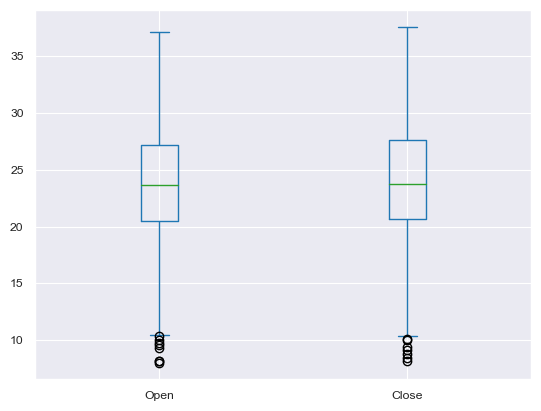

In [393]:
metrics = bpca[['Open',  'Close']].reset_index()
metrics.plot.box()

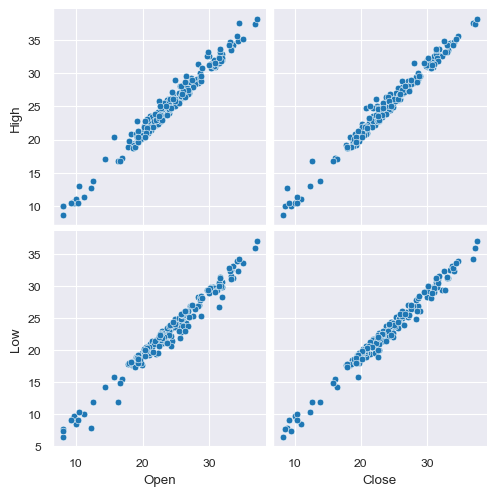

In [394]:
to_observe = bpca[["Open", "High", "Low", "Close"]]
sns.pairplot(
        data=to_observe, 
        x_vars=["Open", "Close"], 
        y_vars=["High", "Low"], 
        diag_kind='hist', 
        diag_kws=dict(fill=False),
                )
plt.show()

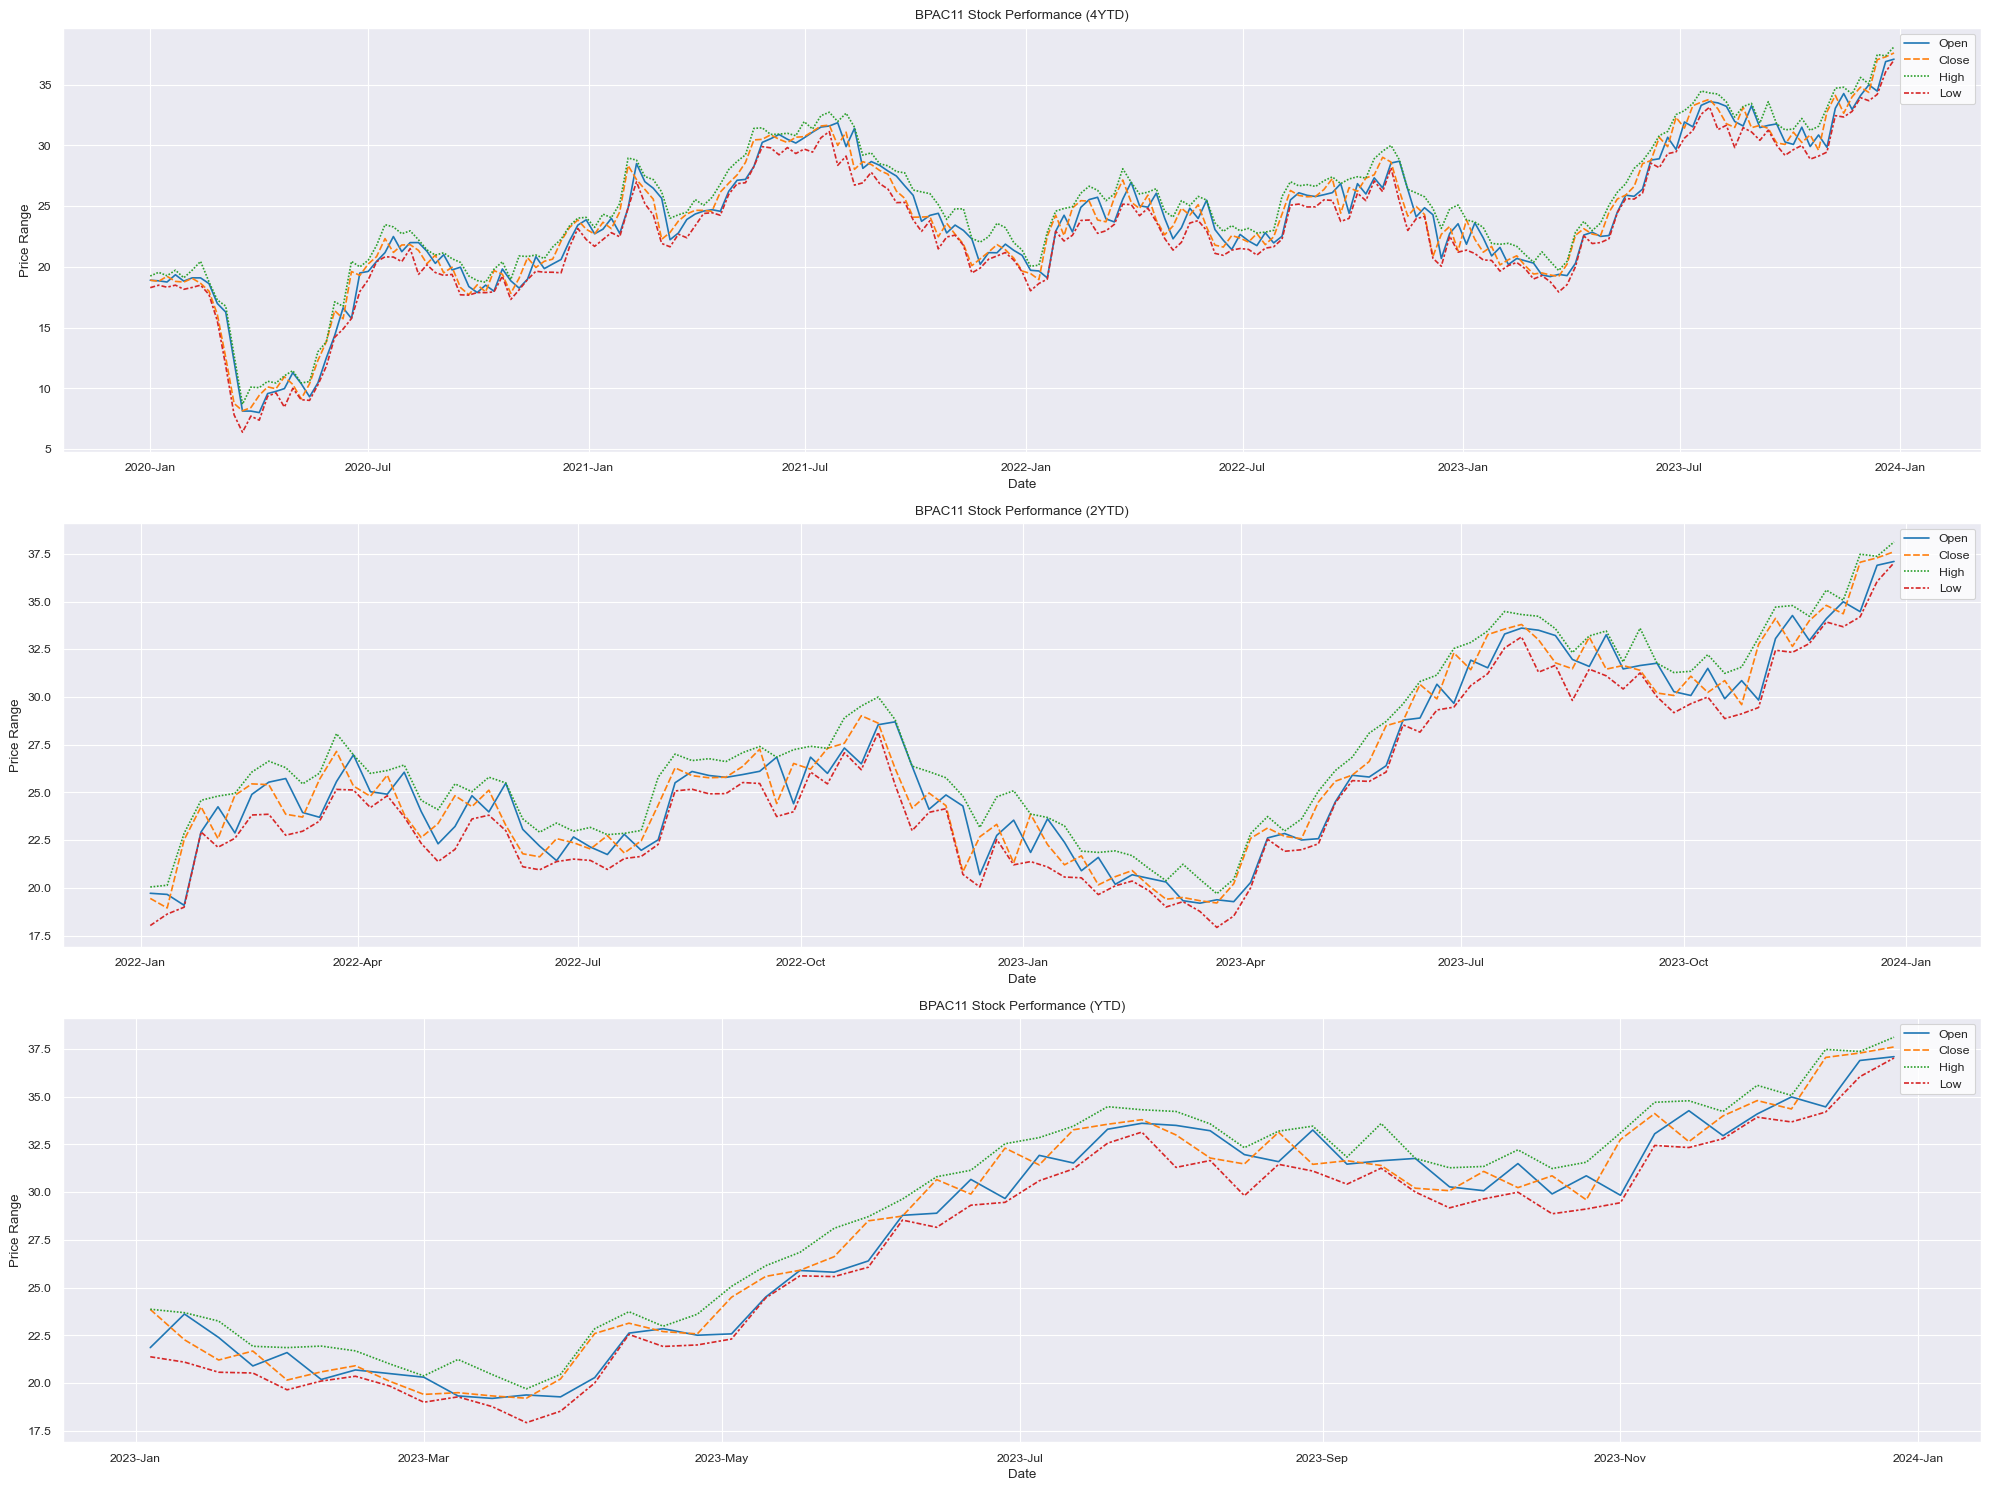

<Figure size 640x480 with 0 Axes>

In [410]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(20,15))

sns.set_style('whitegrid')
sns.set_context('paper')

# AXIS 0
range_1 = bpca.query("Date >= '2020-01-01'")
range_1_data = range_1[["Open", "Close", "High", "Low"]]

sns.lineplot(range_1_data, ax=ax0)

ax0.set(ylabel="Price Range",
        title=f"BPAC11 Stock Performance (4YTD)")

ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

# AXIS 1
range_2 = bpca.query("Date >= '2022-01-01'")
range_2_data = range_2[["Open", "Close", "High", "Low"]]

sns.lineplot(range_2_data, ax=ax1)

ax1.set(ylabel="Price Range",
        title="BPAC11 Stock Performance (2YTD)")

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

# AXIS 2
range_3 = bpca.query("Date > '2023-01-01'")
range_3_data = range_3[["Open", "Close", "High", "Low"]]

sns.lineplot(range_3_data, ax=ax2)

ax2.set(ylabel="Price Range",
        title="BPAC11 Stock Performance (YTD)")

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.tight_layout()
plt.show()
plt.clf()


# Macroeconomic Analysis

Getting a grasp of macroeconomic trends. For interest rate we are looking at the base Brazilain inrest rate, SELIC. For inflation, we are looking at two among the major indexes IPCA and IGPM.

What are the metrics?

- SELIC Rate: It is Central Bank of Brazil's major monetary policy tool for controling inflation. In "practice", it is the average of the daily interest rate applied in interbanking transactions with public federal bonds. Bacen operates in the market in order to keep the practiced rate in the market aligned with the targeted rate defined by the Monetary Policy Committee (COPOM), Bacen's entity responsible for defining the target SELIC rate. SELIC comes from "_Sistema de Liquidação e Custódia_", which Bacen's managed system were these public bonds are transactioned.

- IPCA: Standing for "_Índice Nacional de Preços ao Consumidor Amplo_" is Brazil's official inflation. It is Brazil's official inflation metric. It gathers items usually consumed by Brazilian families.

- IGPM: Calculated by Getulio Vargas Foundation, stands for "_Índice de Preço ao Consumidor Amplo_", and it's a broad inflation metric, monthly calculating variation in the price of a broad range of items, from agricultural raw-material to goods and services turned to the final consumer.

IPCA is the main Central Bank of Brazil's inflation rate, and it's considered the offical inflation metric.

In [396]:
selic = sgs.get({'selic':432}, start='2015-01-01').reset_index()

selic.head()

,Date,selic
0,2015-01-01,11.75
1,2015-01-02,11.75
2,2015-01-03,11.75
3,2015-01-04,11.75
4,2015-01-05,11.75


In [397]:
selic = selic.rename(columns={'Date':'date', 'selic':'interest_rate'})

selic['interest_rate'].describe()

count    3286.000000
mean        9.297855
std         4.269771
min         2.000000
25%         6.500000
50%         9.250000
75%        13.750000
max        14.250000
Name: interest_rate, dtype: float64

<Axes: >

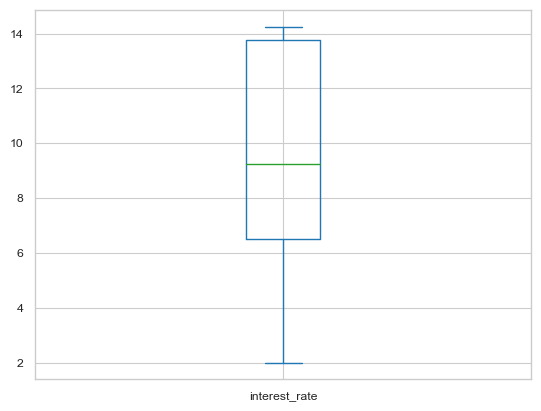

In [398]:
selic.plot.box()

In [399]:
inflation = sgs.get({'ipca':433, 'igpm':189}, start='2015-01-01').reset_index()

inflation.head()

,Date,ipca,igpm
0,2015-01-01,1.24,0.76
1,2015-02-01,1.22,0.27
2,2015-03-01,1.32,0.98
3,2015-04-01,0.71,1.17
4,2015-05-01,0.74,0.41


In [400]:
inflation['Date'] = pd.to_datetime(inflation['Date'])
inflation.describe()

,ipca,igpm
count,107.00000,108.000000
mean,0.47514,0.656481
std,0.42466,1.082791
min,-0.68000,-1.930000
25%,0.22500,0.095000
50%,0.42000,0.555000
75%,0.76500,1.020000
max,1.62000,4.340000


<Axes: >

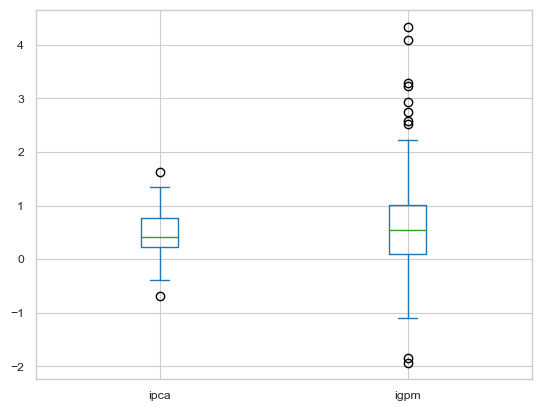

In [401]:
inflation.plot.box()

In [402]:
corr = round(inflation['ipca'].corr(inflation['igpm']), 2)
print(f"IGPM and IPCA have a correlation of {corr}")

IGPM and IPCA have a correlation of 0.41


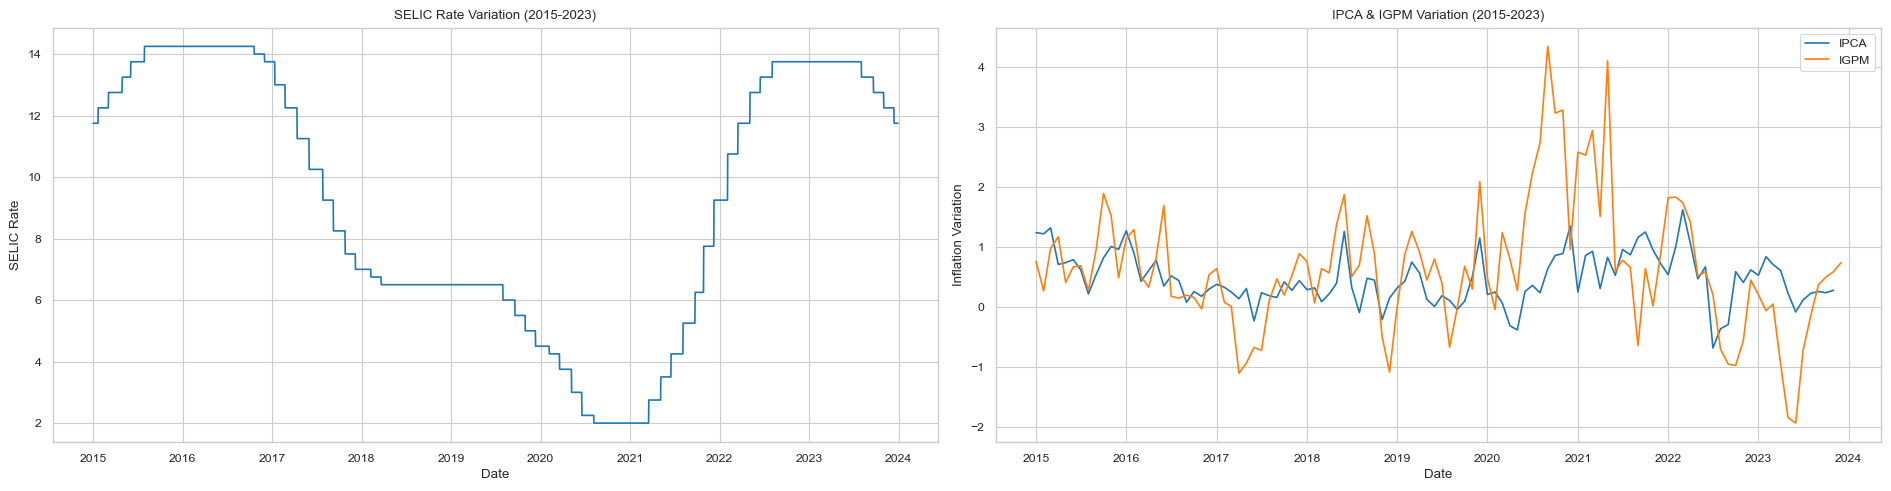

In [403]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(19,5))
sns.set_style('whitegrid')

sns.lineplot(data=selic, x='date', y='interest_rate', ax=ax0)

ax0.set(title="SELIC Rate Variation (2015-2023)",
        ylabel='SELIC Rate',
        xlabel='Date')

inflation_data = inflation.query("Date > '2015-01-01'")

plt.plot(inflation['Date'], inflation[['ipca', 'igpm']])
plt.legend(['IPCA', 'IGPM'])

ax1.set(title="IPCA & IGPM Variation (2015-2023)",
        ylabel='Inflation Variation',
        xlabel='Date')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

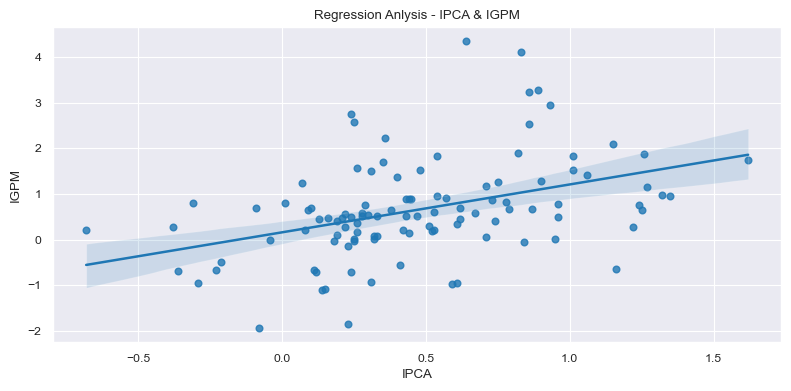

In [404]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(8,4))
sns.regplot(data=inflation, x='ipca', y='igpm', ax=ax)

ax.set(title="Regression Anlysis - IPCA & IGPM",
        ylabel='IGPM',
        xlabel='IPCA')

plt.tight_layout()
plt.show()

## BTG & Macro environment

Assessing how sensible are BTG stocks to the macro environment.

In [405]:
#Combining the data
btg_pac = bpca.reset_index().rename(columns=str.lower)

btg_selic = pd.merge(left=btg_pac, right=selic, on='date', how='inner')

btg_sel = btg_selic[['date', 'open', 'high', 'low', 'close', 'volume', 'interest_rate']]
btg_sel.head()

,date,open,high,low,close,volume,interest_rate
0,2020-01-01,18.900000,19.247499,18.287500,18.900000,18209200,4.5
1,2020-01-08,18.850000,19.549999,18.490000,18.809999,19046000,4.5
2,2020-01-15,18.752501,19.270000,18.325001,19.219999,13832800,4.5
3,2020-01-22,19.350000,19.725000,18.495001,18.805000,21970400,4.5
4,2020-01-29,18.825001,19.100000,18.152500,18.747499,20631600,4.5


Text(0.5, 1.0, 'BTG Closing Price vs SELIC Rate Correlation')

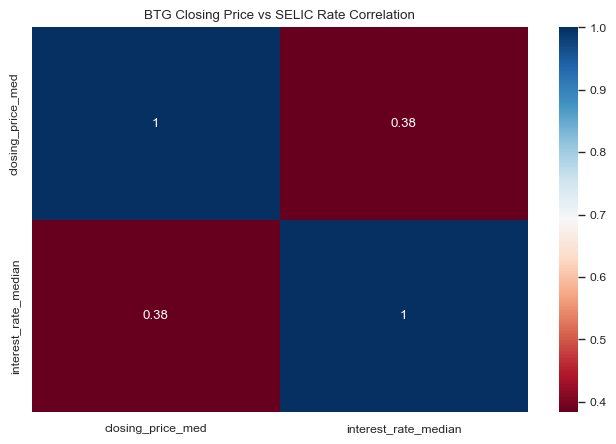

In [406]:
subset_btg = btg_pac[['date', 'close']].copy()
subset_btg['date'] = pd.to_datetime(subset_btg['date'], format='%Y-%m-%d').dt.strftime('%Y-%m')
subset_btg = subset_btg.groupby('date').agg({'close':'median'}).reset_index().rename(columns={'close':'closing_price_med'})
subset_btg['closing_price_med'] = round(subset_btg['closing_price_med'], 2)

selic_subset = selic.copy()
selic_subset['date'] = pd.to_datetime(selic_subset['date']).dt.strftime('%Y-%m')
selic_subset = selic_subset.groupby('date').agg({'interest_rate':'median'}).reset_index().rename(columns={'interest_rate':'interest_rate_median'})

selic_btg_new = pd.merge(subset_btg, selic_subset, on='date', how='inner')

#Correlation
selic_btg_corr = selic_btg_new.corr(numeric_only=True)

#Building the plot
fig = plt.subplots(figsize=(8,5))
sns.heatmap(data=selic_btg_corr, annot=True, cbar=True, cmap='RdBu')
plt.title('BTG Closing Price vs SELIC Rate Correlation')

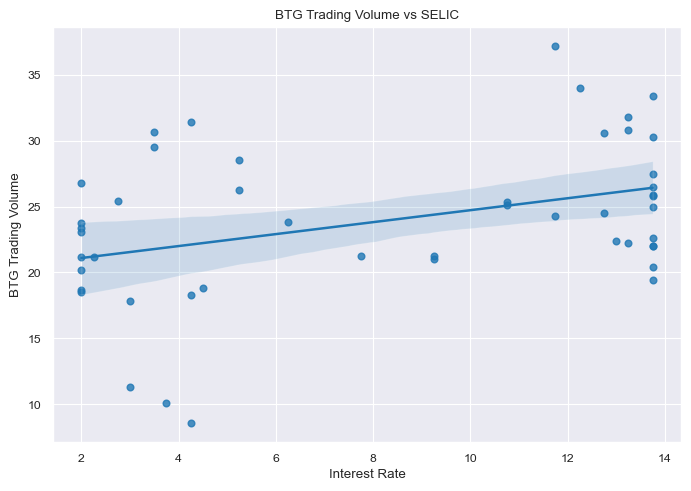

In [407]:
fig, ax = plt.subplots(figsize=(7,5))

sns.regplot(data=selic_btg_new, x='interest_rate_median', y='closing_price_med', ax=ax)

ax.set(title='BTG Trading Volume vs SELIC',
        xlabel='Interest Rate',
        ylabel='BTG Trading Volume')

plt.tight_layout()
plt.show()

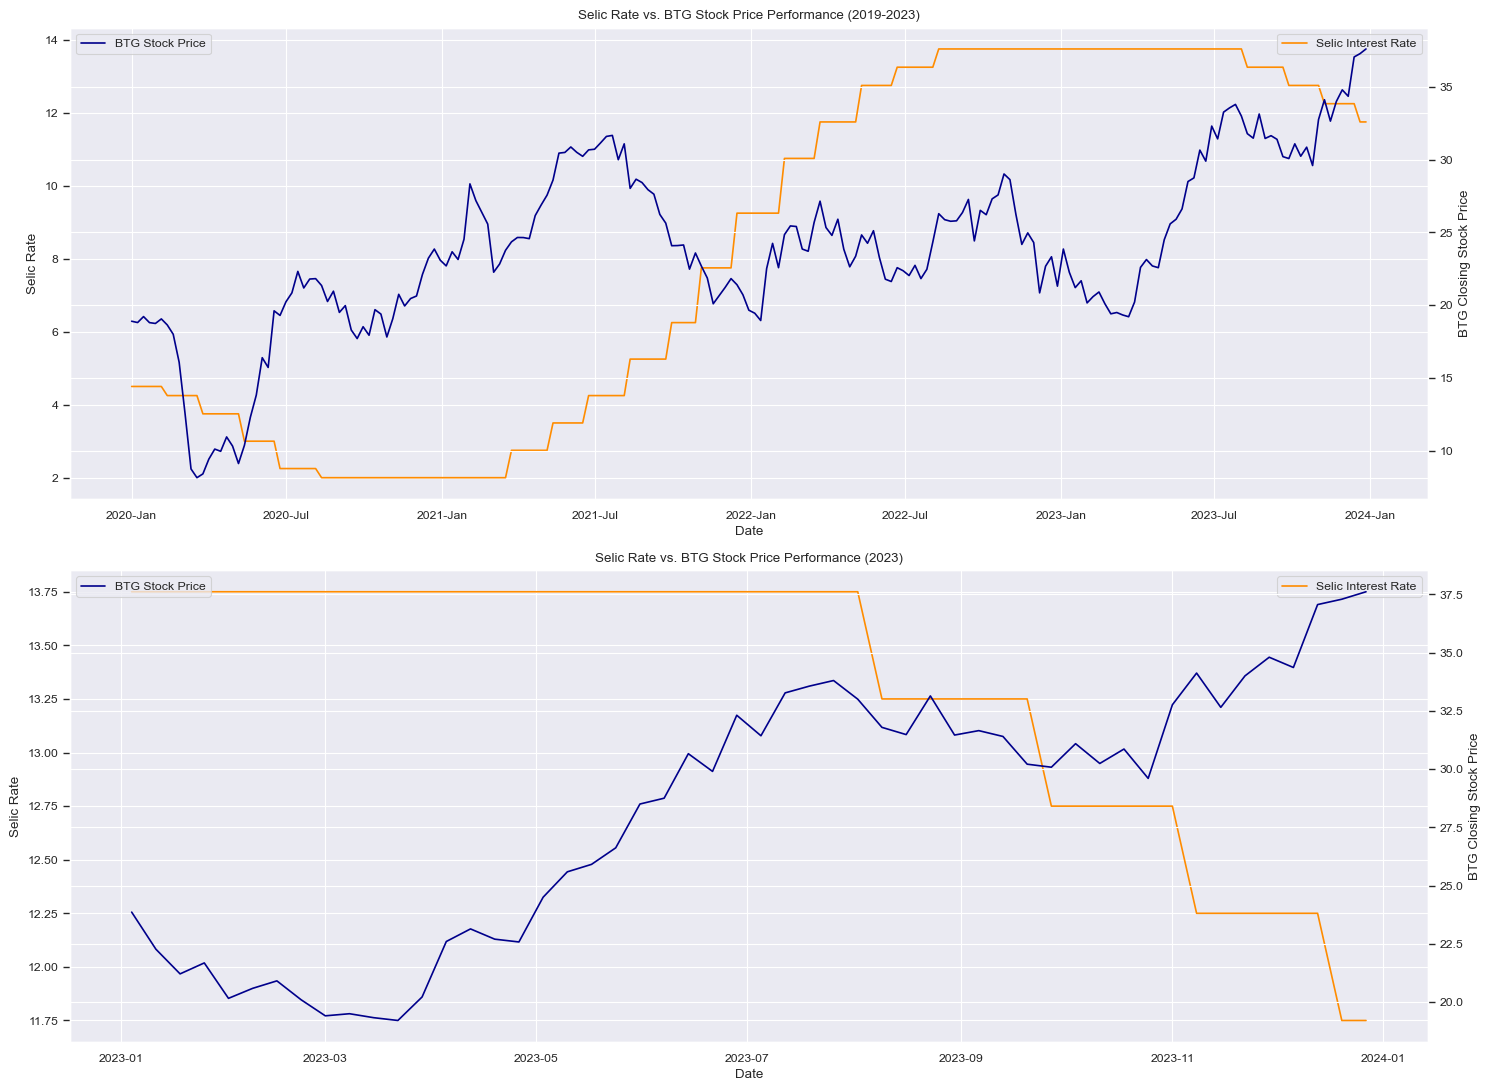

In [408]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(15, 11))

btg_sel_btg_only = btg_sel.drop(columns='interest_rate')

#SELIC plot
sns.lineplot(data=btg_sel, x='date', y='interest_rate', color='darkorange', ax=ax0, label='Selic Interest Rate')
ax0.set(title='Selic Rate vs. BTG Stock Price Performance (2019-2023)',
        xlabel='Date',
        ylabel='Selic Rate')

#BTG plot
ax01 = ax0.twinx()
sns.lineplot(data=btg_sel_btg_only, x='date', y='close', ax=ax01, dashes=True, markers='-.-', color='darkblue', label='BTG Stock Price')
ax01.set_ylabel('BTG Closing Stock Price')

#Legneds
ax0.legend(loc='best')
ax01.legend(loc='best')

# 2023 Frame

only_2023_1 = btg_sel.query("date > '2023-01-01'")
only_23_1_btg = btg_sel_btg_only.query("date > '2023-01-01'")

sns.lineplot(data=only_2023_1, x='date', y='interest_rate', color='darkorange', ax=ax1, label='Selic Interest Rate')
ax1.set(title='Selic Rate vs. BTG Stock Price Performance (2023)',
        xlabel='Date',
        ylabel='Selic Rate')

#BTG plot
ax12 = ax1.twinx()
sns.lineplot(data=only_23_1_btg, x='date', y='close', ax=ax12, dashes=True, markers='-.-', color='darkblue', label='BTG Stock Price')
ax12.set_ylabel('BTG Closing Stock Price')

ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.tight_layout()
plt.show()